<a href="https://colab.research.google.com/github/chessterfries/project-c122/blob/main/Project_C122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = np.load('image.npz')['arr_0']
y = pd.read_csv('data.csv')['labels']
print(pd.Series(y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
nclasses = len(classes)

F    550
Z    550
M    550
E    550
H    550
P    550
B    550
J    550
O    550
W    550
C    550
A    550
V    550
Y    550
X    550
K    550
T    550
L    550
N    550
G    550
R    550
I    550
S    550
Q    550
U    550
D    550
Name: labels, dtype: int64


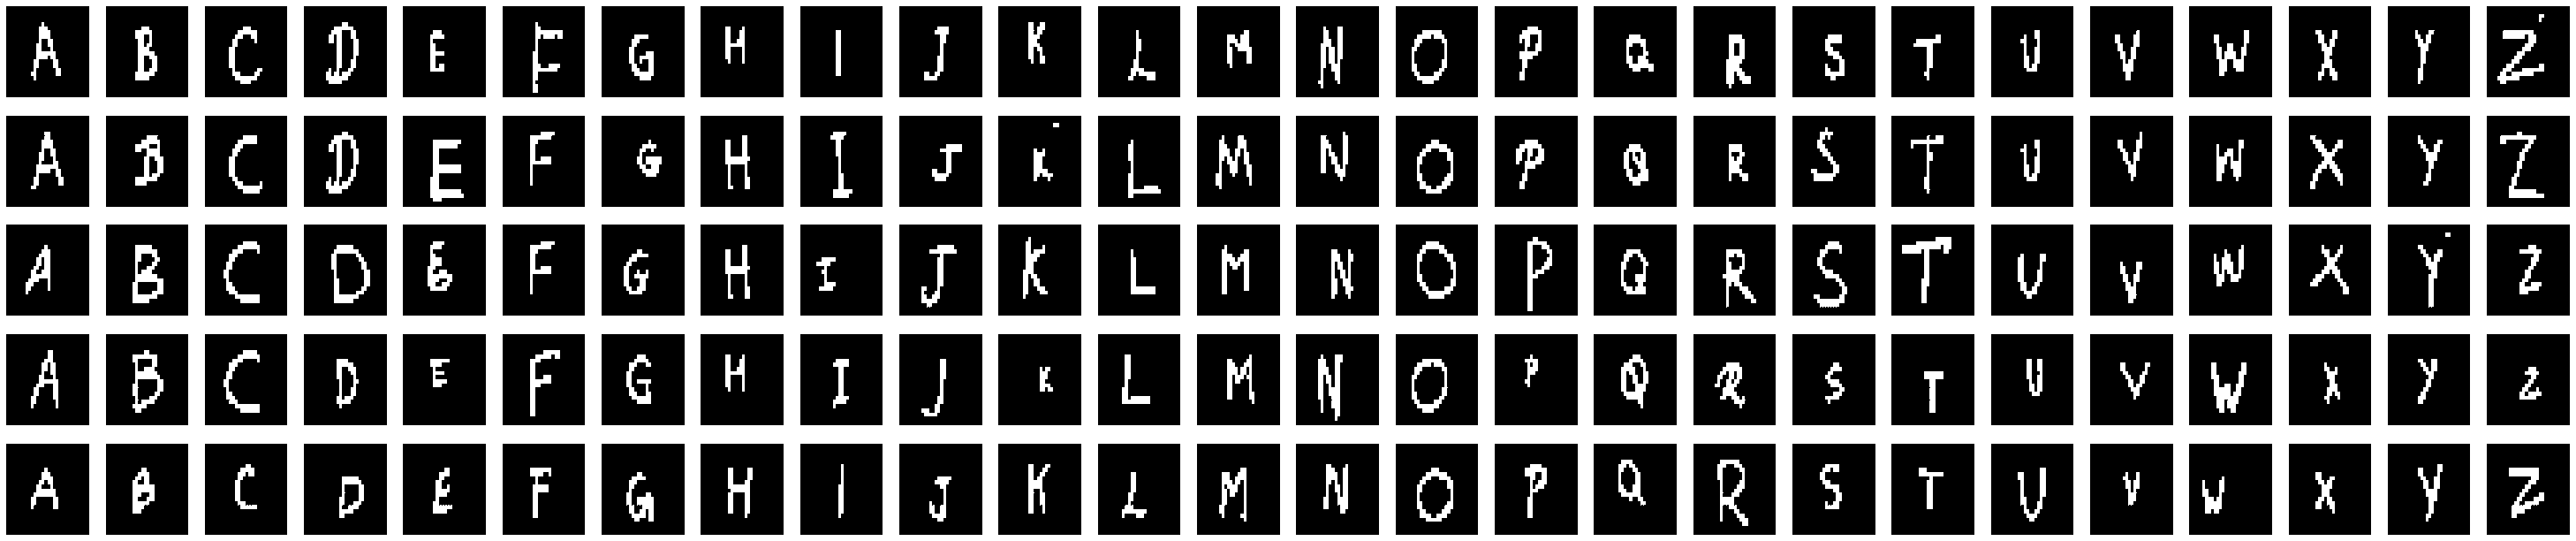

In [ ]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2, (1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx)
    p = sns.heatmap(np.reshape(X[idx], (22, 30)), cmap = plt.cm.gray, xticklabels=False, yticklabels=False, cbar = False)
    p = plt.axis('off')
    i += 1
  idx_cls += 1

In [ ]:
print(len(y))

14300


In [ ]:
print(y.loc[0])

F


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, train_size = 10725, test_size = 3575)
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)

KeyboardInterrupt: ignored

In [ ]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10, 10))
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)